In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

Trafik akƒ±≈üƒ±nƒ±n deƒüi≈ümesi kazalarƒ± nasƒ±l etkiler?
Kaza oranlarƒ±nƒ± ne artƒ±rƒ±r?
Zaman i√ßinde kaza oranlarƒ±nƒ± tahmin edebilir miyiz?
Kƒ±rsal ve kentsel alanlar nasƒ±l farklƒ±la≈ütƒ±?

In [2]:
data1=pd.read_csv('accidents_2005_to_2007.csv');data1.head()

/Users/esrabardakci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date  ...  \
0                     1  04/01/2005  ...   
1                     1  05/01/2005  ...   
2                     1  06/01/2005  ...   
3                     1  07/01/2005  ...   
4                     1  10/01/2005  ...   

       Pedestrian_Crossing-Physical_Facilities  \
0                               Zebra crossing   
1  Pedestrian phase at traffic signal junction   
2        No physical crossing within 50 meters   
3        No physical crossing within 50 meters   
4        No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0           Daylight: Street light present  Raining without high winds   
1  Darkness: Street lights present and lit     Fine without high winds   
2  Darkness: Street lights present and lit     Fine without high winds   
3           Daylight: Street light present     Fine without high winds   
4        Darkness: Street lighting unknown     Fine without high winds   

  Road_Surface_Conditions  Special_Conditions_at_Site  Carriageway_Hazards  \
0                Wet/Damp                        None                 None   
1                     Dry                        None                 None   
2                     Dry                        None                 None   
3                     Dry                        None                 None   
4                Wet/Damp                        None                 None   

  Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                   1                                          Yes   
1                   1                                          Yes   
2                   1                                          Yes   
3                   1                                          Yes   
4                   1                                          Yes   

   LSOA_of_Accident_Location  Year  
0                  E01002849  2005  
1                  E01002909  2005  
2                  E01002857  2005  
3                  E01002840  2005  
4                  E01002863  2005  

[5 rows x 33 columns]

In [3]:
data2=pd.read_csv('accidents_2009_to_2011.csv');data2.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200901BS70001                 524910                  180800  -0.201349   
1  200901BS70002                 525050                  181040  -0.199248   
2  200901BS70003                 526490                  177990  -0.179599   
3  200901BS70004                 524800                  180300  -0.203110   
4  200901BS70005                 526930                  177490  -0.173445   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.512273             1                  2                   2   
1  51.514399             1                  2                   2   
2  51.486668             1                  3                   2   
3  51.507804             1                  2                   2   
4  51.482076             1                  2                   2   

   Number_of_Casualties        Date  ...  \
0                     1  01/01/2009  ...   
1                    11  05/01/2009  ...   
2                     1  04/01/2009  ...   
3                     1  05/01/2009  ...   
4                     1  06/01/2009  ...   

       Pedestrian_Crossing-Physical_Facilities  \
0        No physical crossing within 50 meters   
1                               Zebra crossing   
2        No physical crossing within 50 meters   
3  Pedestrian phase at traffic signal junction   
4        No physical crossing within 50 meters   

                          Light_Conditions       Weather_Conditions  \
0           Daylight: Street light present  Fine without high winds   
1           Daylight: Street light present  Fine without high winds   
2           Daylight: Street light present  Fine without high winds   
3           Daylight: Street light present                    Other   
4  Darkness: Street lights present and lit  Fine without high winds   

  Road_Surface_Conditions  Special_Conditions_at_Site  Carriageway_Hazards  \
0                     Dry                        None                 None   
1                Wet/Damp                        None                 None   
2                     Dry                        None                 None   
3               Frost/Ice                        None                 None   
4                     Dry                        None                 None   

  Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                   1                                          Yes   
1                   1                                          Yes   
2                   1                                          Yes   
3                   1                                          Yes   
4                   1                                          Yes   

   LSOA_of_Accident_Location  Year  
0                  E01002882  2009  
1                  E01002886  2009  
2                  E01002912  2009  
3                  E01002871  2009  
4                  E01002840  2009  

[5 rows x 33 columns]

In [4]:
data3=pd.read_csv('accidents_2012_to_2014.csv');data3.head()

/Users/esrabardakci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  201201BS70001                 527200                  178760  -0.169101   
1  201201BS70002                 524930                  181430  -0.200838   
2  201201BS70003                 525860                  178080  -0.188636   
3  201201BS70004                 524980                  181030  -0.200259   
4  201201BS70005                 526170                  179200  -0.183773   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.493429             1                  3                   2   
1  51.517931             1                  3                   2   
2  51.487618             1                  3                   2   
3  51.514325             1                  3                   1   
4  51.497614             1                  3                   1   

   Number_of_Casualties        Date  ...  \
0                     1  19/01/2012  ...   
1                     1  04/01/2012  ...   
2                     1  10/01/2012  ...   
3                     1  18/01/2012  ...   
4                     1  17/01/2012  ...   

       Pedestrian_Crossing-Physical_Facilities  \
0  Pedestrian phase at traffic signal junction   
1        No physical crossing within 50 meters   
2             non-junction pedestrian crossing   
3        No physical crossing within 50 meters   
4        No physical crossing within 50 meters   

                          Light_Conditions       Weather_Conditions  \
0  Darkness: Street lights present and lit  Fine without high winds   
1  Darkness: Street lights present and lit  Fine without high winds   
2           Daylight: Street light present  Fine without high winds   
3           Daylight: Street light present  Fine without high winds   
4  Darkness: Street lights present and lit  Fine without high winds   

  Road_Surface_Conditions  Special_Conditions_at_Site  Carriageway_Hazards  \
0                     Dry                        None                 None   
1                     Dry                        None                 None   
2                     Dry                        None                 None   
3                     Dry                        None                 None   
4                     Dry                        None                 None   

  Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                   1                                          Yes   
1                   1                                          Yes   
2                   1                                          Yes   
3                   1                                          Yes   
4                   1                                          Yes   

   LSOA_of_Accident_Location  Year  
0                  E01002821  2012  
1                  E01004760  2012  
2                  E01002893  2012  
3                  E01002886  2012  
4                  E01002890  2012  

[5 rows x 33 columns]

In [5]:
data1.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

Veri setlerini alt alta ekleyelim.

In [6]:
df = pd.concat([data1, data2, data3], ignore_index=True);df

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0        200501BS00001               525680.0                178240.0   
1        200501BS00002               524170.0                181650.0   
2        200501BS00003               524520.0                182240.0   
3        200501BS00004               526900.0                177530.0   
4        200501BS00005               528060.0                179040.0   
...                ...                    ...                     ...   
1504145       2.01E+12               310037.0                597647.0   
1504146       2.01E+12               321509.0                574063.0   
1504147       2.01E+12               321337.0                566365.0   
1504148       2.01E+12               323869.0                566853.0   
1504149       2.01E+12               314072.0                579971.0   

         Longitude   Latitude  Police_Force  Accident_Severity  \
0        -0.191170  51.489096             1                  2   
1        -0.211708  51.520075             1                  3   
2        -0.206458  51.525301             1                  3   
3        -0.173862  51.482442             1                  3   
4        -0.156618  51.495752             1                  3   
...            ...        ...           ...                ...   
1504145  -3.417278  55.264773            98                  2   
1504146  -3.230255  55.054855            98                  3   
1504147  -3.230826  54.985668            98                  3   
1504148  -3.191397  54.990446            98                  2   
1504149  -3.348426  55.106700            98                  3   

         Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                         1                     1  04/01/2005  ...   
1                         1                     1  05/01/2005  ...   
2                         2                     1  06/01/2005  ...   
3                         1                     1  07/01/2005  ...   
4                         1                     1  10/01/2005  ...   
...                     ...                   ...         ...  ...   
1504145                   2                     1  07/12/2014  ...   
1504146                   2                     2  11/12/2014  ...   
1504147                   1                     1  09/12/2014  ...   
1504148                   3                     2  17/12/2014  ...   
1504149                   2                     2  24/12/2014  ...   

             Pedestrian_Crossing-Physical_Facilities  \
0                                     Zebra crossing   
1        Pedestrian phase at traffic signal junction   
2              No physical crossing within 50 meters   
3              No physical crossing within 50 meters   
4              No physical crossing within 50 meters   
...                                              ...   
1504145        No physical crossing within 50 meters   
1504146        No physical crossing within 50 meters   
1504147        No physical crossing within 50 meters   
1504148        No physical crossing within 50 meters   
1504149        No physical crossing within 50 meters   

                                Light_Conditions          Weather_Conditions  \
0                 Daylight: Street light present  Raining without high winds   
1        Darkness: Street lights present and lit     Fine without high winds   
2        Darkness: Street lights present and lit     Fine without high winds   
3                 Daylight: Street light present     Fine without high winds   
4              Darkness: Street lighting unknown     Fine without high winds   
...                                          ...                         ...   
1504145            Darkeness: No street lighting  Snowing without high winds   
1504146            Darkeness: No street lighting     Fine without high winds   
1504147  Darkness: Street lights present and lit     Fine without high winds   
1504148            Darke

In [7]:
df.duplicated().sum() #duplike olmu≈ü 34155 adet satƒ±rƒ±mƒ±z var. Temizleyelim.

34155

In [8]:
df=df.drop_duplicates()

In [9]:
len(df)

1469995

Bazƒ± kolonlarda y√ºksek miktarda bazƒ±larƒ±nda ise t√∂lere edilebilir miktarda eksik veri olduƒüu g√∂r√ºl√ºyor. Junction_Detail kolonunda hi√ß veri bulunmadƒ±ƒüƒ±nƒ± da g√∂r√ºyoruz.

In [10]:
df.isna().sum() #bazƒ± kolonlarda y√ºksek miktarda eksik veri var

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

√ñncelikle 'Junction_Detail', 'Junction_Control','LSOA_of_Accident_Location' kolonlarƒ±nƒ± dataframeden silelim. Kullanmayacaƒüƒ±z.

In [11]:
df = df.drop(columns=['Junction_Detail', 'Junction_Control','LSOA_of_Accident_Location'], axis=1) 

'Weather_Conditions' ve 'Did_Police_Officer_Attend_Scene_of_Accident' kategorik verileri Unknown olarak dolduralƒ±m.

In [12]:
df['Weather_Conditions'].fillna('Unknown', inplace=True) 

In [13]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Unknown', inplace=True)

T√∂lere edilebilir miktarda eksik veri bulunan ve analiz i√ßin kullanabileceƒüim kolonlarƒ±n eksik veri satƒ±rlarƒ±nƒ± silelim.

In [14]:
# Eksik veri temizliƒüi i√ßin se√ßilen kolonlar
cols_to_check = [
    'Road_Surface_Conditions',
    'Pedestrian_Crossing-Physical_Facilities',
    'Pedestrian_Crossing-Human_Control',
    'Time',
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    'Longitude',
    'Latitude',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards'
]

# Bu kolonlarda eksik olan satƒ±rlarƒ± √ßƒ±kar
df = df.dropna(subset=cols_to_check).reset_index(drop=True)

Trafik akƒ±≈üƒ±nƒ±n deƒüi≈ümesi kazalarƒ± nasƒ±l etkiler? sorusuna cevap arayalƒ±m.

In [15]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year'],
      dtype='object')

In [16]:
# Time kolonundaki eksikler zaten temizlenmi≈üti
# Saat bilgisini ayƒ±klƒ±yoruz
df['Hour'] = df['Time'].str[:2].astype(int)

In [17]:
def map_time_period(hour):
    if 0 <= hour < 6:
        return 'Gece'
    elif 6 <= hour < 12:
        return 'Sabah'
    elif 12 <= hour < 18:
        return '√ñƒüleden Sonra'
    else:
        return 'Ak≈üam'

df['Time_Period'] = df['Hour'].apply(map_time_period)

Saat dilimlerine g√∂re toplam kaza sayƒ±sƒ±nƒ± g√∂rselle≈ütirelim

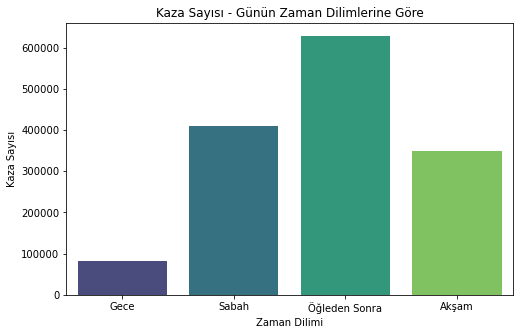

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_Period', order=['Gece', 'Sabah', '√ñƒüleden Sonra', 'Ak≈üam'], palette='viridis')
plt.title('Kaza Sayƒ±sƒ± - G√ºn√ºn Zaman Dilimlerine G√∂re')
plt.xlabel('Zaman Dilimi')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.show()

Kaza ≈ûiddeti (Accident_Severity) vs Saat
Kaza ≈üiddeti 1 (en ciddi), 2 (orta), 3 (hafif) olacak ≈üekilde kodlanmƒ±≈üsa, bunu da saat dilimlerine g√∂re inceleyebiliriz:

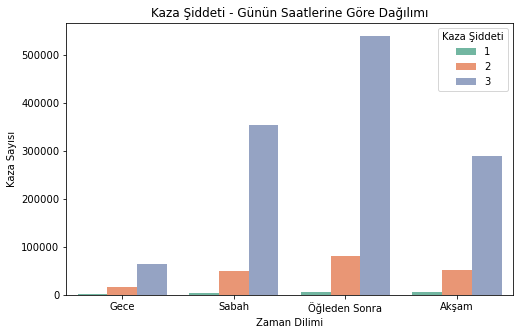

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_Period', hue='Accident_Severity', order=['Gece', 'Sabah', '√ñƒüleden Sonra', 'Ak≈üam'], palette='Set2')
plt.title('Kaza ≈ûiddeti - G√ºn√ºn Saatlerine G√∂re Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Zaman Dilimi')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.legend(title='Kaza ≈ûiddeti')
plt.show()

Ara√ß Sayƒ±sƒ± ile Zaman ƒ∞li≈ükisi
√áok ara√ßlƒ± kazalar belli saatlerde artƒ±yor mu?

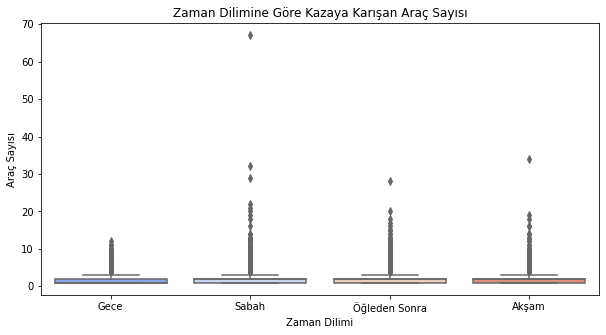

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Time_Period', y='Number_of_Vehicles', order=['Gece', 'Sabah', '√ñƒüleden Sonra', 'Ak≈üam'], palette='coolwarm')
plt.title('Zaman Dilimine G√∂re Kazaya Karƒ±≈üan Ara√ß Sayƒ±sƒ±')
plt.xlabel('Zaman Dilimi')
plt.ylabel('Ara√ß Sayƒ±sƒ±')
plt.show()

yukarƒ±daki grafikte outlierlar kaynaklƒ± √ßƒ±ktƒ±lar net deƒüil. Outlierlarƒ± dƒ±≈üarda bƒ±rakƒ±p deƒüerlendirelim.

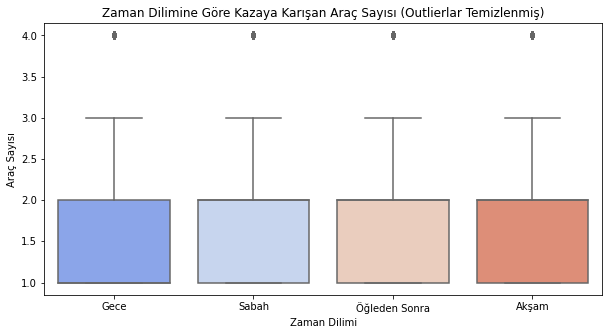

In [21]:
threshold = df['Number_of_Vehicles'].quantile(0.99)
df_filtered = df[df['Number_of_Vehicles'] <= threshold]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, x='Time_Period', y='Number_of_Vehicles', order=['Gece', 'Sabah', '√ñƒüleden Sonra', 'Ak≈üam'], palette='coolwarm')
plt.title('Zaman Dilimine G√∂re Kazaya Karƒ±≈üan Ara√ß Sayƒ±sƒ± (Outlierlar Temizlenmi≈ü)')
plt.xlabel('Zaman Dilimi')
plt.ylabel('Ara√ß Sayƒ±sƒ±')
plt.show()

G√∂rsel Yorum (Outlier'sƒ±z)
‚úÖ G√∂zlenenler:
T√ºm zaman dilimlerinde medyan ara√ß sayƒ±sƒ± tam olarak aynƒ±: 2.

IQR (box y√ºksekliƒüi) de olduk√ßa benzer. Yani 25% ile 75% dilim arasƒ±ndaki ara√ß sayƒ±sƒ± her zaman diliminde 1 ile 2 arasƒ±nda.

Maksimum deƒüerler (whisker √ºst√º) genelde 3, bazƒ± az sayƒ±da 4‚Äôl√ºk outlier kalmƒ±≈ü.

Sabah, √∂ƒüleden sonra, ak≈üam ve gece saatlerinde kazaya karƒ±≈üan ara√ß sayƒ±sƒ±nda ciddi bir farklƒ±lƒ±k yok.

üîé Ne √ßƒ±karabiliriz?
Trafik akƒ±≈üƒ±nƒ±n saatlik deƒüi≈üimi, kazaya karƒ±≈üan ara√ß sayƒ±sƒ±nda anlamlƒ± bir fark yaratmamƒ±≈ü gibi g√∂r√ºn√ºyor.

Bu, ≈üunu g√∂sterebilir:

G√ºn√ºn her saatinde meydana gelen kazalar genellikle 2 ara√ß arasƒ±nda oluyor.

Zincirleme kazalar (√ßok ara√ßlƒ± kazalar) nadiren oluyor ve t√ºm zaman dilimlerinde benzer oranlarda.

hem kaza sayƒ±sƒ±nƒ±n hem de kaza ≈üiddetinin √∂ƒüleden sonra arttƒ±ƒüƒ±nƒ± g√∂zlemlediysen, bu √ßok √∂nemli bir i√ßg√∂r√º. ≈ûimdi birlikte bunu veriye dayanarak daha net ifade edelim ve birka√ß yorum + √∂neriyle ilerleyelim:

Text(0.5, 1.0, 'Kaza ≈ûiddeti - G√ºn√ºn Zaman Dilimlerine G√∂re')

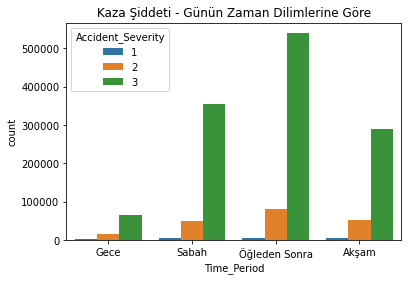

In [22]:
sns.countplot(data=df, x='Time_Period', hue='Accident_Severity', order=['Gece', 'Sabah', '√ñƒüleden Sonra', 'Ak≈üam'])
plt.title("Kaza ≈ûiddeti - G√ºn√ºn Zaman Dilimlerine G√∂re")

üìå Olasƒ± Nedenler (Veriyle Baƒülantƒ±lƒ± Yorumlar)
Neden √∂ƒüleden sonra daha √ßok ve ciddi kaza oluyor olabilir?
Trafik yoƒüunluƒüu:
ƒ∞≈ü √ßƒ±kƒ±≈ü saatleri (16:00‚Äì18:00) bu d√∂neme denk gelir. Daha √ßok ara√ß trafikte ‚Üí daha √ßok etkile≈üim ‚Üí daha fazla kaza.

Yorgunluk/algƒ± azalmasƒ±:
G√ºn ortasƒ±nda dikkat daƒüƒ±nƒ±klƒ±ƒüƒ± ve yorgunluk artabilir.

I≈üƒ±k ko≈üullarƒ± deƒüi≈üimi:
Kƒ±≈ü aylarƒ±nda √∂ƒüleden sonra hava kararmaya ba≈ülar ‚Üí g√∂rsel algƒ± d√º≈üer.

Okul √ßƒ±kƒ±≈üƒ± / servis saatleri:
√ñƒürenci ta≈üƒ±macƒ±lƒ±ƒüƒ± trafiƒüi artƒ±rƒ±r.

In [23]:
#√ñƒüleden sonra saat aralƒ±ƒüƒ±nƒ± detaylandƒ±r:

df[df['Time_Period'] == '√ñƒüleden Sonra']['Hour'].value_counts().sort_index()

12     87051
13     89178
14     89046
15    113316
16    119168
17    130351
Name: Hour, dtype: int64

‚úÖ 1. Saat 15:00‚Äôten sonra ciddi artƒ±≈ü ba≈ülƒ±yor.
14:00 ‚Üí 89 bin

15:00 ‚Üí 113 bin
‚Üí %27 artƒ±≈ü!

‚úÖ 2. En √ßok kaza 17:00‚Äôde oluyor.
Bu, a√ßƒ±k ≈üekilde i≈ü √ßƒ±kƒ±≈ü saati etkisini g√∂steriyor.

√ñƒürenci ve servis trafiƒüi de buna katkƒ± saƒülar.

‚úÖ 3. Yoƒüunlukla birlikte risk artƒ±yor.
Daha fazla ara√ß = daha fazla etkile≈üim

Belki yorgunluk, dikkatsizlik, acelecilik bu saatlerde pik yapƒ±yor.



--------------------------------------------

Kaza oranlarƒ±nƒ± ne artƒ±rƒ±r?

In [31]:
df['Accident_Severity'].value_counts(normalize=True) *100

3    85.167999
2    13.535757
1     1.296244
Name: Accident_Severity, dtype: float64

In [35]:
pd.crosstab(df['Speed_limit'], df['Accident_Severity'], normalize='columns') * 100

Accident_Severity          1          2          3
Speed_limit                                       
10                  0.010512   0.001007   0.000800
15                  0.000000   0.000000   0.000800
20                  0.499317   1.177803   1.118970
30                 32.954904  58.643010  65.488554
40                  9.239987   8.188750   8.166610
50                  5.397877   3.542972   3.177802
60                 38.746978  21.978105  14.677964
70                 13.150426   6.468353   7.368500

Ciddi kazalar oransal olarak en √ßok 60 mph hƒ±zda meydana geliyor. Toplam hafif ve orta kazalarƒ±n b√ºy√ºk √ßoƒüunluƒüu ise 30 mph gibi ≈üehir i√ßi hƒ±zlarda ger√ßekle≈üiyor. Bu da ≈üehir i√ßi kazalarƒ±n daha sƒ±k ama daha az tehlikeli olduƒüunu g√∂steriyor.

In [36]:
pd.crosstab(df['Weather_Conditions'], df['Accident_Severity'], normalize='columns') * 100

Accident_Severity                   1          2          3
Weather_Conditions                                         
Fine with high winds         1.750237   1.334340   1.208405
Fine without high winds     83.086303  82.612307  79.689027
Fog or mist                  0.904026   0.569775   0.539486
Other                        1.524230   1.800931   2.318015
Raining with high winds      1.445391   1.357493   1.390553
Raining without high winds   9.544833  10.435133  12.027409
Snowing with high winds      0.068328   0.111740   0.135752
Snowing without high winds   0.467781   0.534541   0.798990
Unknown                      1.208872   1.243740   1.892362

üß† Yorumlar:
‚úÖ 1. En √ßok kaza a√ßƒ±k havada oluyor
T√ºm ciddi kazalarƒ±n %83'√º ‚Üí ‚ÄúFine without high winds‚Äù

Ancak bu, bu havanƒ±n tehlikeli olduƒüu anlamƒ±na gelmez!

√á√ºnk√º √ßoƒüu trafik o havada yapƒ±lƒ±yor ‚Üí maruziyet y√ºksek

Yaƒümurlu havada s√ºr√º≈ü oranƒ± √ßok daha az ‚Üí buna raƒümen %10+ ciddi kaza ‚Üí bu ko≈üullarda risk daha y√ºksek



In [37]:
pd.crosstab(df['Weather_Conditions'], df['Accident_Severity'], normalize='index') * 100

Accident_Severity                  1          2          3
Weather_Conditions                                        
Fine with high winds        1.840796  14.654505  83.504699
Fine without high winds     1.344089  13.955292  84.700620
Fog or mist                 2.137177  14.065606  83.797217
Other                       0.882935  10.893591  88.223474
Raining with high winds     1.351019  13.249816  85.399165
Raining without high winds  1.050318  11.990746  86.958936
Snowing with high winds     0.672878  11.490683  87.836439
Snowing without high winds  0.798995   9.534069  89.666936
Unknown                     0.872633   9.375119  89.752248

Sis ve mistik hava ko≈üullarƒ±, kazalarƒ±n daha ciddi olma ihtimalini artƒ±rƒ±yor.

R√ºzgar etkisi de kaza ≈üiddetinde artƒ±≈ü yaratƒ±yor, ancak a√ßƒ±k havadan √ßok daha az yaygƒ±n.

Kar yaƒüƒ±≈üƒ± ve diƒüer a≈üƒ±rƒ± ko≈üullar, s√ºr√ºc√ºlerin temkinli davranmasƒ± nedeniyle daha az ciddi kaza ile sonu√ßlanƒ±yor olabilir.

Genelde en √ßok kaza a√ßƒ±k havada (%80+ hafif), ama kaza ≈üiddeti a√ßƒ±sƒ±ndan sis + r√ºzgar gibi ko≈üullar daha riskli.

In [39]:
# √ñzellik listesi
features = [
    'Speed_limit',
    'Weather_Conditions',
    'Light_Conditions',
    'Road_Surface_Conditions',
    'Urban_or_Rural_Area',
    'Pedestrian_Crossing-Physical_Facilities',
    'Pedestrian_Crossing-Human_Control'
]

# Her √∂zellik i√ßin normalize='index' ve normalize='columns' tablolarƒ±
for feature in features:
    print(f"\n\n=== {feature} - normalize='index' ===")
    print(pd.crosstab(df[feature], df['Accident_Severity'], normalize='index') * 100)

    print(f"\n\n=== {feature} - normalize='columns' ===")
    print(pd.crosstab(df[feature], df['Accident_Severity'], normalize='columns') * 100)



=== Speed_limit - normalize='index' ===
Accident_Severity          1          2           3
Speed_limit                                        
10                 14.285714  14.285714   71.428571
15                  0.000000   0.000000  100.000000
20                  0.578457  14.248310   85.173233
30                  0.666003  12.375656   86.958341
40                  1.463585  13.544407   84.992008
50                  2.148940  14.728715   83.122345
60                  3.143402  18.618643   78.237955
70                  2.328200  11.958312   85.713488


=== Speed_limit - normalize='columns' ===
Accident_Severity          1          2          3
Speed_limit                                       
10                  0.010512   0.001007   0.000800
15                  0.000000   0.000000   0.000800
20                  0.499317   1.177803   1.118970
30                 32.954904  58.643010  65.488554
40                  9.239987   8.188750   8.166610
50                  5.397877   3.5429

1. Speed_limit
normalize='index': Hƒ±z arttƒ±k√ßa ciddi kaza oranƒ± artƒ±yor, 60 mph %3.14 ile en y√ºksek ciddi kaza oranƒ±

normalize='columns': Ciddi kazalarƒ±n %38.7‚Äôsi 60 mph‚Äôde, %33‚Äô√º 30 mph‚Äôde ger√ßekle≈ümi≈ü

Yorum: Orta-y√ºksek hƒ±zlarda ciddi kaza riski artƒ±yor. 30 mph‚Äôde ise hafif ve orta kazalar √ßok.

2. Weather_Conditions
normalize='index': K√∂t√º hava ko≈üullarƒ±nda (√∂rneƒüin ‚ÄúFog or mist‚Äù) ciddi kaza oranƒ± %2.1, a√ßƒ±k havada %1.3-1.8 civarƒ±

normalize='columns': T√ºm ciddi kazalarƒ±n %83‚Äô√º ‚ÄúFine without high winds‚Äù yani a√ßƒ±k havada ama maruziyet y√ºksek

Yorum: K√∂t√º hava az ama orantƒ±sal olarak daha tehlikeli. A√ßƒ±k hava ko≈üullarƒ±nda ise kazalar daha sƒ±k ama oransal olarak daha az ciddi.

3. Light_Conditions
normalize='index': "Darkeness: No street lighting" ciddi kaza oranƒ± %4.3 ile en y√ºksek

normalize='columns': Ciddi kazalarƒ±n %18.7‚Äôsi bu ko≈üulda olmu≈ü

Yorum: Sokak lambasƒ± olmayan karanlƒ±k yerlerde kaza riski ve ciddiyeti artƒ±yor.

4. Road_Surface_Conditions
normalize='index': En y√ºksek ciddi kaza oranƒ± ‚ÄúFlood (Over 3cm of water)‚Äù ile %1.98

normalize='columns': Kazalarƒ±n √ßoƒüu ‚ÄúDry‚Äù yani kuru zeminde (%67 ciddi kazalar dahil)

Yorum: K√∂t√º yol ko≈üullarƒ± az fakat ciddi kazalara neden oluyor; kuru zeminde ise kazalar daha sƒ±k.

5. Urban_or_Rural_Area
normalize='index': Kƒ±rsal alan (2) ciddi kaza oranƒ± %2.35 ile ≈üehir merkezine g√∂re y√ºksek (1‚Äôde %0.7)

normalize='columns': Ciddi kazalarƒ±n %64.7‚Äôsi kƒ±rsal alanda, %35.2‚Äôsi ≈üehirde ger√ßekle≈ümi≈ü

Yorum: Kƒ±rsal alanlarda kaza ≈üiddeti daha y√ºksek, ≈üehirde ise kaza sayƒ±sƒ± fazla ama daha hafif sonu√ßlu.

6. Pedestrian_Crossing-Physical_Facilities
normalize='index': Ciddi kaza oranlarƒ± t√ºm crossing tiplerinde yakla≈üƒ±k %0.6-1.7 arasƒ±, en y√ºksek ‚ÄúFootbridge or subway‚Äù

normalize='columns': Ciddi kazalarƒ±n %89‚Äôu ‚ÄúNo physical crossing within 50 meters‚Äù b√∂lgesinde

Yorum: Yaya ge√ßidinin olmadƒ±ƒüƒ± b√∂lgelerde ciddi kaza oranƒ± y√ºksek, yaya ge√ßitleri risk azaltƒ±cƒ±.

7. Pedestrian_Crossing-Human_Control
normalize='index': ‚ÄúNone within 50 metres‚Äù olan yerlerde ciddi kaza oranƒ± %1.3, diƒüer kontroll√º alanlarda daha d√º≈ü√ºk

normalize='columns': Ciddi kazalarƒ±n %99.7‚Äôsi kontrols√ºz b√∂lgelerde ger√ßekle≈ümi≈ü

Yorum: Yaya ge√ßidinde insan kontrol√º olmamasƒ± ciddi kazalarƒ± artƒ±rƒ±yor.

Sonu√ß √ñnerisi:
En kritik risk fakt√∂rleri:

Y√ºksek hƒ±z (√∂zellikle 50-60 mph arasƒ±)

K√∂t√º hava ve g√∂r√º≈ü ko≈üullarƒ± (sis, karanlƒ±k, yaƒümur)

Kƒ±rsal alanlarda kazalarƒ±n daha ciddi olmasƒ±

Yaya ge√ßidi eksikliƒüi ve kontrols√ºz yaya b√∂lgeleri

Karar vericiye √∂neri:

Hƒ±z kontrol√º ve hƒ±z limiti d√ºzenlemeleri

K√∂t√º hava ko≈üullarƒ±nda s√ºr√ºc√º bilgilendirmesi ve uyarƒ±lar

Kƒ±rsal yollarƒ±n g√ºvenlik iyile≈ütirilmesi

Yaya ge√ßidi ve kontrol sistemlerinin artƒ±rƒ±lmasƒ±



Kƒ±rsal ve Kentsel alanlar nasƒ±l farklƒ±la≈ütƒ±?

In [41]:
# Urban_or_Rural_Area i√ßin normalize='index' (satƒ±r bazlƒ±)
print("=== Urban_or_Rural_Area - normalize='index' ===")
print(pd.crosstab(df['Urban_or_Rural_Area'], df['Accident_Severity'], normalize='index') * 100)

print("\n=== Urban_or_Rural_Area - normalize='columns' ===")
# Urban_or_Rural_Area i√ßin normalize='columns' (s√ºtun bazlƒ±)
print(pd.crosstab(df['Urban_or_Rural_Area'], df['Accident_Severity'], normalize='columns') * 100)

=== Urban_or_Rural_Area - normalize='index' ===
Accident_Severity           1          2          3
Urban_or_Rural_Area                                
1                    0.709869  12.210822  87.079310
2                    2.354474  15.927000  81.718525
3                    0.000000   8.571429  91.428571

=== Urban_or_Rural_Area - normalize='columns' ===
Accident_Severity            1          2          3
Urban_or_Rural_Area                                 
1                    35.235993  58.044042  65.786055
2                    64.764007  41.954448  34.211385
3                     0.000000   0.001510   0.002560


Sonu√ß
Yarƒ± kƒ±rsal alanlar ciddi kaza a√ßƒ±sƒ±ndan en riskli b√∂lgeler.

Kentsel alanlarda kaza sayƒ±sƒ± fazla, ancak genellikle hafif seyrediyor.

Kƒ±rsal alanlarda kaza sayƒ±sƒ± ve ciddi kaza oranƒ± d√º≈ü√ºk (ancak veri sayƒ±sƒ± da d√º≈ü√ºk olabilir).



In [42]:
def plot_crosstab_comparison(df, feature, target='Accident_Severity', figsize=(14,6)):
    """
    df: veri √ßer√ßevesi
    feature: kategorik √∂zellik adƒ± (string)
    target: hedef kolon (default 'Accident_Severity')
    figsize: grafik boyutu
    """
    # normalize index ve columns crosstab
    ct_index = pd.crosstab(df[feature], df[target], normalize='index') * 100
    ct_columns = pd.crosstab(df[feature], df[target], normalize='columns') * 100
    
    # Plot
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    
    ct_index.plot(kind='bar', stacked=True, ax=axs[0], colormap='Set2')
    axs[0].set_title(f"{feature} - normalize='index'\nHer {feature} i√ßin kaza ≈üiddeti daƒüƒ±lƒ±mƒ± (%)")
    axs[0].set_ylabel('Y√ºzde')
    axs[0].set_xlabel(feature)
    axs[0].legend(title='Kaza ≈ûiddeti')
    
    ct_columns.plot(kind='bar', stacked=True, ax=axs[1], colormap='Set3')
    axs[1].set_title(f"{feature} - normalize='columns'\nHer kaza ≈üiddeti i√ßin {feature} daƒüƒ±lƒ±mƒ± (%)")
    axs[1].set_ylabel('Y√ºzde')
    axs[1].set_xlabel(feature)
    axs[1].legend(title='Kaza ≈ûiddeti')
    
    plt.tight_layout()
    plt.show()

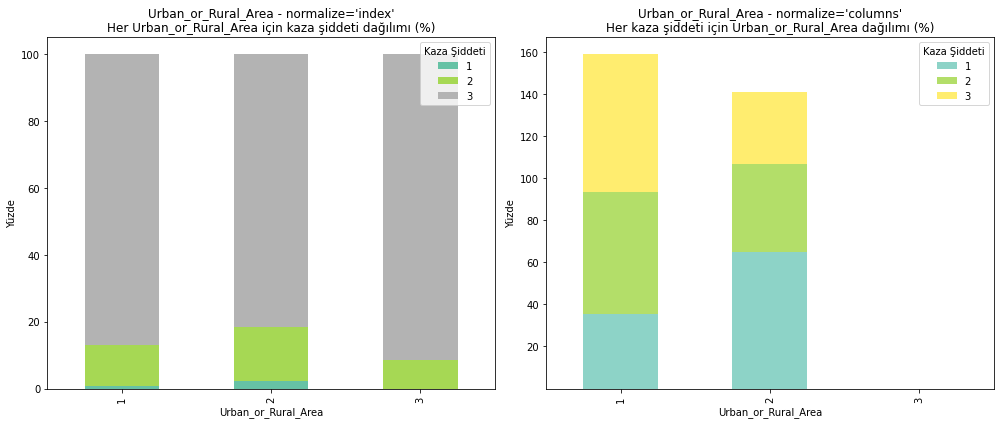

In [43]:
plot_crosstab_comparison(df, 'Urban_or_Rural_Area')

--------

In [59]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Hour', 'Time_Period', 'Severe', 'Month'],
      dtype='object')

Zaman i√ßinde kaza oranlarƒ±nƒ± tahmin edebilir miyiz?

In [48]:
# Tarih formatƒ±nƒ± d√ºzeltelim
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Haftalƒ±k toplam kaza sayƒ±sƒ±nƒ± alalƒ±m
weekly_counts = df.resample('W', on='Date').size()

In [50]:
weekly_counts

Date
2005-01-02     612
2005-01-09    3139
2005-01-16    3861
2005-01-23    4140
2005-01-30    3925
              ... 
2014-12-07    3069
2014-12-14    3268
2014-12-21    2930
2014-12-28    1969
2015-01-04     785
Freq: W-SUN, Length: 523, dtype: int64

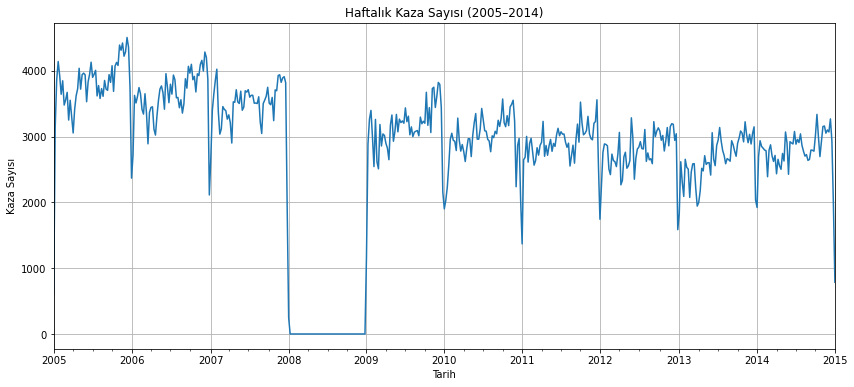

In [51]:
plt.figure(figsize=(14,6))
weekly_counts.plot()
plt.title('Haftalƒ±k Kaza Sayƒ±sƒ± (2005‚Äì2014)')
plt.xlabel('Tarih')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.grid(True)
plt.show()

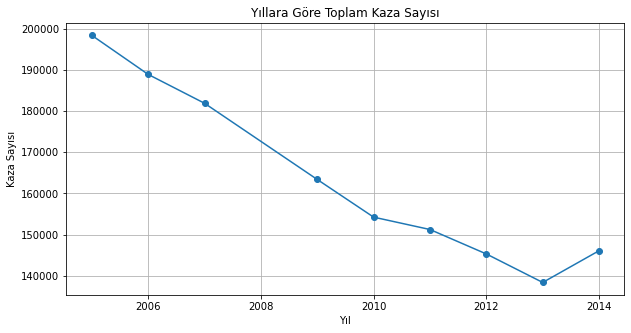

In [52]:
# Yƒ±llƒ±k toplam kaza sayƒ±sƒ±
yearly = df.groupby('Year').size()

# √áizgi grafik
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Yƒ±llara G√∂re Toplam Kaza Sayƒ±sƒ±")
plt.xlabel("Yƒ±l")
plt.ylabel("Kaza Sayƒ±sƒ±")
plt.grid(True)
plt.show()


Normalde yƒ±llar i√ßinde kaza oranlarƒ±nda bir d√º≈ü√º≈ü varken 2013 sonrasƒ±nda ani bir y√ºkeli≈ü ya≈üanmƒ±≈ü.

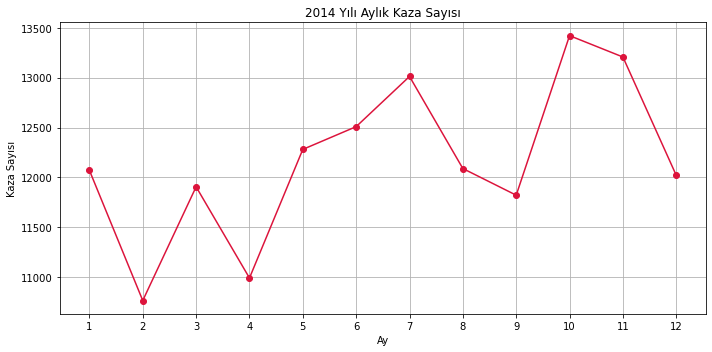

In [54]:
# 2014 verisini filtrele
df_2014 = df[df['Year'] == 2014].copy()

# Ay kolonu olu≈ütur
df_2014['Month'] = df_2014['Date'].dt.month

# Aylƒ±k kaza sayƒ±sƒ±
monthly_counts = df_2014['Month'].value_counts().sort_index()

# G√∂rselle≈ütirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='crimson')
plt.title('2014 Yƒ±lƒ± Aylƒ±k Kaza Sayƒ±sƒ±')
plt.xlabel('Ay')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


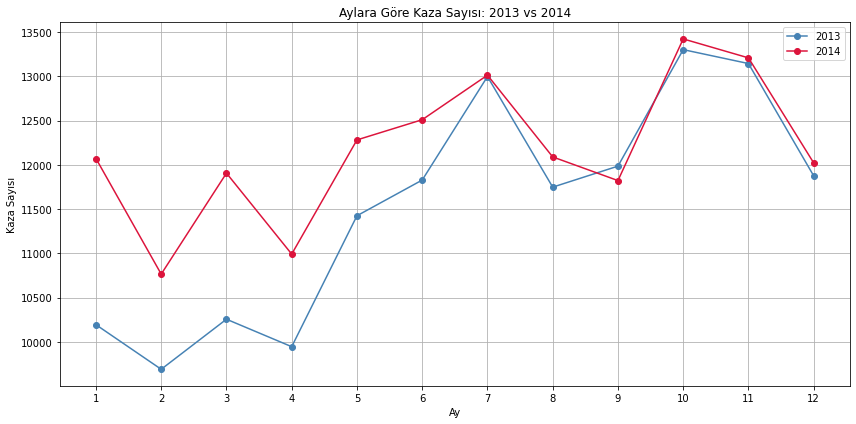

In [55]:

# 2013 ve 2014 i√ßin filtreleme
df_2013 = df[df['Year'] == 2013].copy()
df_2014 = df[df['Year'] == 2014].copy()

# Ay kolonunu √ßƒ±kar
df_2013['Month'] = df_2013['Date'].dt.month
df_2014['Month'] = df_2014['Date'].dt.month

# Aylƒ±k kaza sayƒ±larƒ±nƒ± al
monthly_2013 = df_2013['Month'].value_counts().sort_index()
monthly_2014 = df_2014['Month'].value_counts().sort_index()

# Grafik √ßizimi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_2013.index, monthly_2013.values, marker='o', label='2013', color='steelblue')
plt.plot(monthly_2014.index, monthly_2014.values, marker='o', label='2014', color='crimson')

plt.title('Aylara G√∂re Kaza Sayƒ±sƒ±: 2013 vs 2014')
plt.xlabel('Ay')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

üìà 2013 vs 2014 Aylƒ±k Kaza Sayƒ±larƒ± Kar≈üƒ±la≈ütƒ±rmasƒ± ‚Äì Yorum
üìå Genel Desen:
Her iki yƒ±lda da benzer bir mevsimsel desen var:

Kazalar ilkbahardan yaza doƒüru artƒ±yor.

7. ay (Temmuz) her iki yƒ±lda da zirve noktasƒ±.

Ardƒ±ndan sonbahar ve kƒ±≈üa doƒüru d√º≈ü√º≈ü ya≈üanƒ±yor.

üìå Farklƒ±la≈üan Noktalar:
2014 yƒ±lƒ±, 2013‚Äô√ºn aynƒ± desenini izliyor ama t√ºm deƒüerler daha y√ºksek:

√ñzellikle Ocak‚ÄìHaziran arasƒ± fark bariz.

Bu, sistematik bir artƒ±≈üƒ± veya 2014'e √∂zel bazƒ± dƒ±≈üsal fakt√∂rleri (hava, yasa, trafik yoƒüunluƒüu, altyapƒ± √ßalƒ±≈ümalarƒ± vs.) i≈üaret ediyor olabilir.

7. ayda kesi≈üme ilgin√ß: Bu ay tavan nokta ama artƒ±≈ü farkƒ± kapanƒ±yor.

Bu, yaz aylarƒ±nda alƒ±nan ge√ßici √∂nlemlerin (√∂rneƒüin tatil sezonu trafik kontrolleri) etkisi olabilir.

In [56]:
# Ay ve yƒ±l kolonlarƒ±nƒ± √ßƒ±kartalƒ±m
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month

# 2013 ve 2014, ilk 6 ay (Ocak-Haziran) filtresi
df_13_14 = df[(df['Year'].isin([2013, 2014])) & (df['Month'] <= 6)]

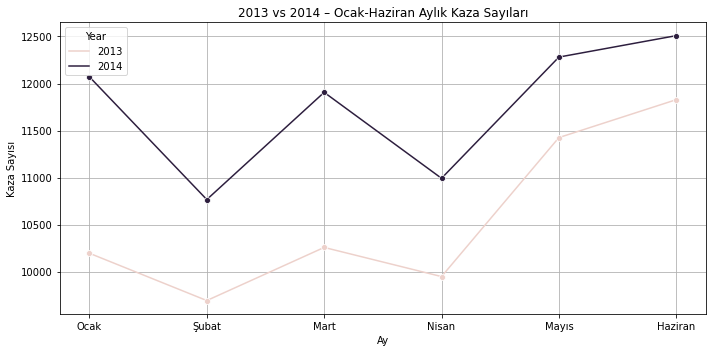

In [57]:
# Aylƒ±k kaza sayƒ±sƒ±nƒ± grup olarak hesapla
monthly_counts = df_13_14.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')

# Grafik
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_counts, x='Month', y='Accident_Count', hue='Year', marker='o')
plt.title('2013 vs 2014 ‚Äì Ocak-Haziran Aylƒ±k Kaza Sayƒ±larƒ±')
plt.xlabel('Ay')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.xticks(ticks=range(1, 7), labels=['Ocak', '≈ûubat', 'Mart', 'Nisan', 'Mayƒ±s', 'Haziran'])
plt.grid(True)
plt.tight_layout()
plt.show()